In [24]:
from IPython.display import SVG
def show_svg():
    return SVG(svg_data)

imgdata = io.StringIO()
fig.savefig(imgdata, format='svg')
imgdata.seek(0)  # rewind the data
#svg_data = (b'<svg'+imgdata.getvalue().encode().split(b'svg>')[1]).decode('ascii', 'ignore')
svg_data = (imgdata.getvalue().encode()).decode('ascii', 'ignore')
svg_data =  imgdata.getvalue() 
#show_svg()

In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors
import csv
from math import log10
import io
import seaborn as sns

In [2]:
bins=200
data = []
fa ="C:/dev/Science/geiger_20190815_175540.txt"
fb = "C:/dev/Science/geiger_20190813_101516.txt"

def get(nm):
    d = []
    with open(nm) as f:
        r = csv.reader(f, delimiter='\t')
        for row in r:
            v = float(row[2])
            #v = round(v/100,0)
            v = v/1000000
            if(v>0):
                #d.append(log10(v))
                d.append(v)
    print('\t', len(d))
    print('\t', sum(d)/len(d))
    return d
                
data = data + get(fa)
data = data + get(fb)

print(len(data))
print(sum(data)/len(data))

	 42022
	 7440.541914858851
	 13597
	 7532.464859961747
55619
7463.014024831439


Text(0.5, 1.0, 'Count Interval')

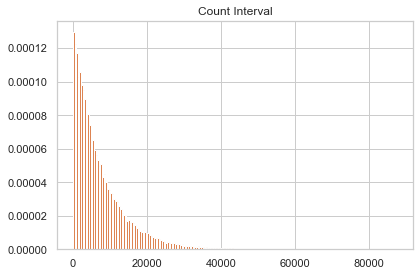

In [3]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(1, 1, tight_layout=True)
N, bins, patches = axs.hist(data, bins=bins, density=True)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
	color = plt.cm.viridis(norm(thisfrac))
	thispatch.set_facecolor(color)

axs.hist(data, bins=bins, density=True)
#plt.xlim(0, max(data))
plt.title("Count Interval")

In [7]:
import numpy as np 
a = np.array(data)
hist, bins = np.histogram(a,bins='sturges') 

Text(0.5, 1.0, 'Count Interval')

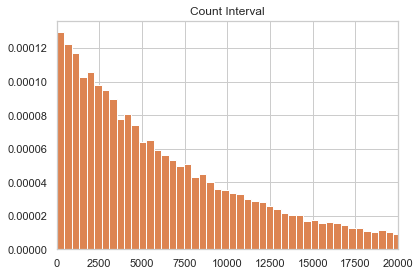

In [9]:
sns.set(style="whitegrid")

hist, bins = np.histogram(a,bins=200) 

fig, axs = plt.subplots(1, 1, tight_layout=True)
N, bins, patches = axs.hist(a, bins=bins, density=True)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
	color = plt.cm.viridis(norm(thisfrac))
	thispatch.set_facecolor(color)

axs.hist(a, bins=200, density=True)
plt.xlim(0, 20000)
plt.title("Count Interval")

In [10]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

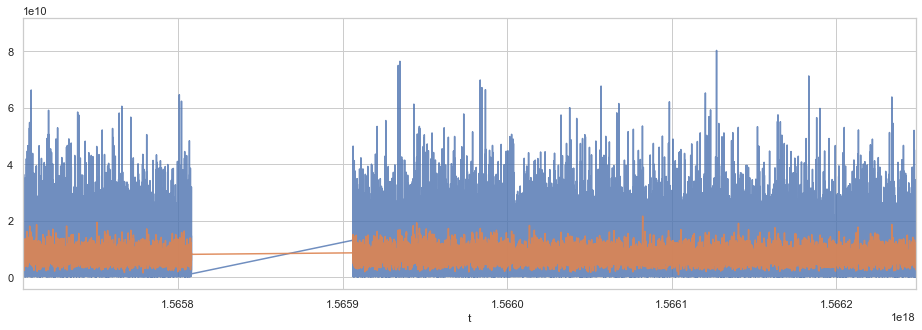

In [56]:
bins=200
data = []
fa ="C:/dev/Science/geiger_20190815_175540.txt"
fb = "C:/dev/Science/geiger_20190813_101516.txt"
names = ['i','r','c','t']
csv = pd.read_csv(fb,header=None,delimiter='\t',index_col=3, names=names).append(
       pd.read_csv(fa,header=None,delimiter='\t',index_col=3,names=names))

ds = pd.Series(csv['c'])
rm = ds.rolling(window=10).mean()
ds.plot(figsize=(16,5), alpha=0.8)
rm.plot(figsize=(16,5),alpha=0.9)

In [20]:
csv.head(2)

,i,r,c
t,,,
1565705808978310800,1,0,87606000000
1565705813343310800,2,1,4365000000


,t,i,r,c
0,1565705808978310800,1,0,87606000000
1,1565705813343310800,2,1,4365000000
2,1565705818348310800,3,0,5005000000
3,1565705822170310800,4,1,3822000000
4,1565705826087310800,5,0,3917000000


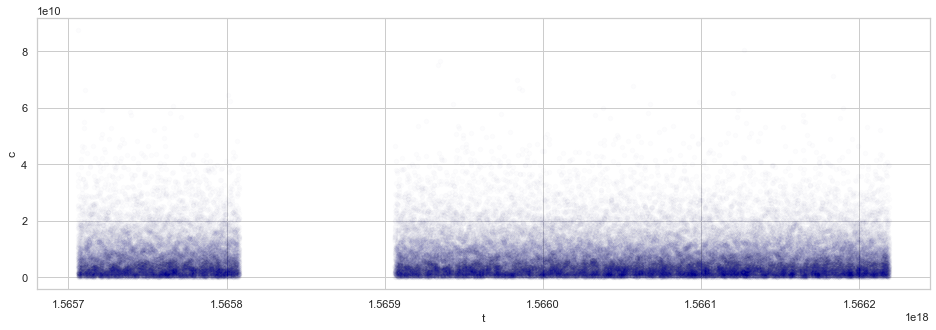

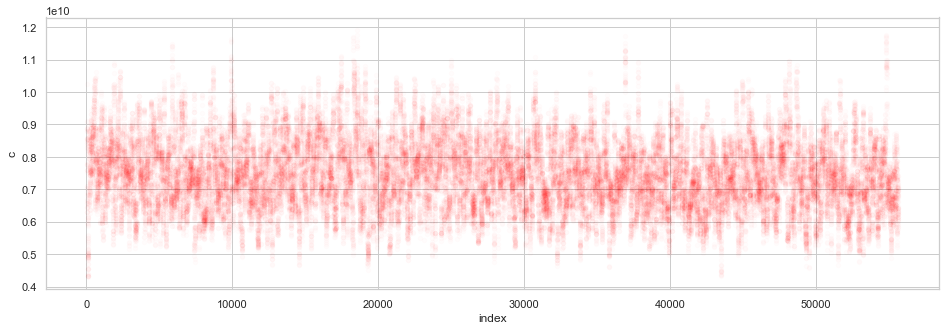

In [53]:
df = csv.reset_index()
df.head()
ax1 = df.plot.scatter(x='t',y='c',figsize=(16,5),c='DarkBlue',alpha=0.01)
rm = df['c'].rolling(window=50).mean()
dr = rm.reset_index()
dr.plot.scatter(x='index',y='c',figsize=(16,5),c='Red',alpha=0.01)


Bc =  [8.99176286 0.         0.        ]
Calculating plot...
Plot written to "helmholtz_coil.png"


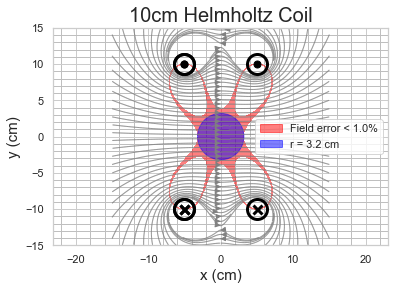

In [116]:
#!/usr/bin/env python3

#
# Helmholtz coil plot example
#

import math
import loopfield as lf
import loopfield.plot as lfp

# field object
field = lf.Field(length_units = lf.cm,
                 current_units = lf.A,
                 field_units = lf.uT)


# Helmholtz coil model with single current loops
R = 10.

# 2 windings
c1 = lf.Loop([-R/2., 0, 0], [1, 0, 0], R, 1)
c2 = lf.Loop([+R/2., 0, 0], [1, 0, 0], R, 1)

# add windings to field
field.addLoop(c1)
field.addLoop(c2)

# evaluate field at center of coil
Bc = field.evaluate([0., 0., 0.])
print('Bc = ', Bc)

print('Calculating plot...')

# function returns ratio of x-component to that at coil center
def x_ratio(B):
  return B[0] / Bc[0]

# create XY plot
min_x = -15
max_x = +15
min_y = -15
max_y = +15
n_x = 101
n_y = 101
plot = lfp.plotXY(field,
                  min_x, max_x, n_x,
                  min_y, max_y, n_y)

# add field lines
plot.fieldLines()

# add loop symbols
plot.loopSymbols(scale = 1.)

# add 1% error bound region
tol = 0.01
plot.region(x_ratio, [1.-tol, 1.+tol], color='red', alpha=0.5,
            label = ('Field error < %2.1f%%' % (100*tol)))

# add circled area hand-adjusted to fit in 1% error volume "octopus"
center_r = 3.2
plot.circle([0., 0.], radius = center_r, color='blue', alpha=0.5,
            label = ('r = %2.1f cm' % center_r))


# add text
plot.labels(title = '10cm Helmholtz Coil',
            xlabel = 'x (cm)', ylabel = 'y (cm)')

# save plot
#plot.save('helmholtz_coil.png')
#print('Plot written to "helmholtz_coil.png"')


Bc =  [753.98223686   0.           0.        ]
Calculating plot...
Plot written to "maxwell_coil.png"


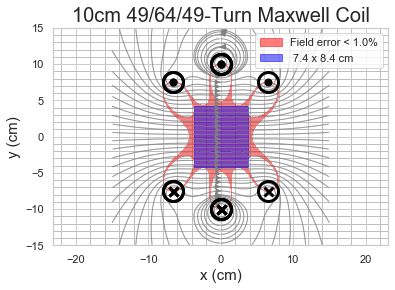

In [125]:
#!/usr/bin/env python3

#
# Maxwell coil plot example
#

import math
import loopfield as lf
import loopfield.plot as lfp

# field object
field = lf.Field(length_units = lf.cm,
                 current_units = lf.A,
                 field_units = lf.uT)


# Maxwell coil model with single current loops

R = 10

# center winding
c1 = lf.Loop([0, 0, 0], [1, 0, 0], R, 64)

# outer windings
c2 = lf.Loop([-R*math.sqrt(3./7.), 0, 0], [1, 0, 0], R*math.sqrt(4./7.), 49)
c3 = lf.Loop([+R*math.sqrt(3./7.), 0, 0], [1, 0, 0], R*math.sqrt(4./7.), 49)

# add windings to field
field.addLoop(c1)
field.addLoop(c2)
field.addLoop(c3)

# evaluate field at center of coil
Bc = field.evaluate([0., 0., 0.])
print('Bc = ', Bc)

print('Calculating plot...')

# function returns ratio of x-component to that at coil center
def x_ratio(B):
  return B[0] / Bc[0]

# create XY plot
min_x = -15
max_x = +15
min_y = -15
max_y = +15
n_x = 101
n_y = 101
plot = lfp.plotXY(field,
                  min_x, max_x, n_x,
                  min_y, max_y, n_y)

# add field lines
plot.fieldLines()

# add loop symbols
plot.loopSymbols(scale = 1.)

# add 1% error bound region
tol = 0.01
plot.region(x_ratio, [1.-tol, 1.+tol], color='red', alpha=0.5,
            label = ('Field error < %2.1f%%' % (100*tol)))

# add rectangular area hand-adjusted to fit in 1% error volume
area_x = 3.7
area_y = 4.2
plot.rectangle([-area_x, +area_x, -area_y, +area_y],
               color='blue', alpha = 0.5,
               label = (' %2.1f x %2.1f cm' % (2*area_x, 2*area_y)))

# add text
plot.labels(title = '10cm 49/64/49-Turn Maxwell Coil',
            xlabel = 'x (cm)', ylabel = 'y (cm)')



# save plot
plot.save('maxwell_coil.png')
print('Plot written to "maxwell_coil.png"')
